In [ ]:
from google.colab import files
uploaded =files.upload()

Saving Churn_Modelling.csv to Churn_Modelling (2).csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Exploratory Data Analysis(EDA)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


1. Youngest customer is 18 years old
2. Oldest customer is 92 years old
3. While majority of customers lie within 32 to 44 years


Dropping irrelevant columns

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
churn=df[df['Exited']==1]
not_churn=df[df['Exited']==0]

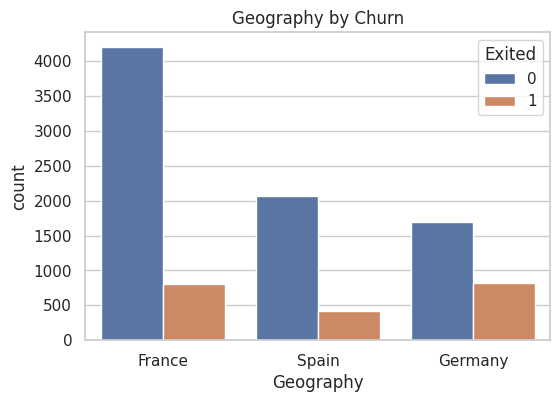

Exited        0     1
Geography            
France     0.84  0.16
Germany    0.68  0.32
Spain      0.83  0.17


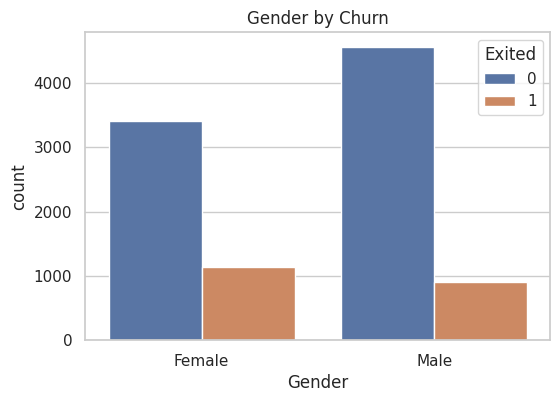

Exited     0     1
Gender            
Female  0.75  0.25
Male    0.84  0.16


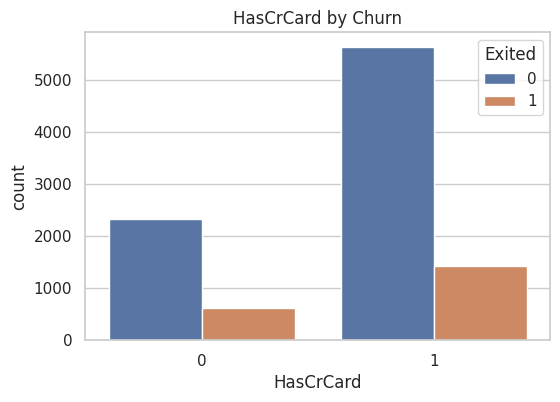

Exited        0     1
HasCrCard            
0          0.79  0.21
1          0.80  0.20


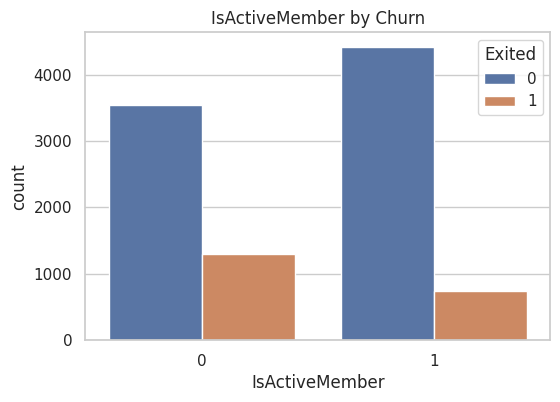

Exited             0     1
IsActiveMember            
0               0.73  0.27
1               0.86  0.14


In [ ]:
categorical = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Exited')
    plt.title(f"{col} by Churn")
    plt.show()

    print(pd.crosstab(df[col], df['Exited'], normalize='index').round(2))


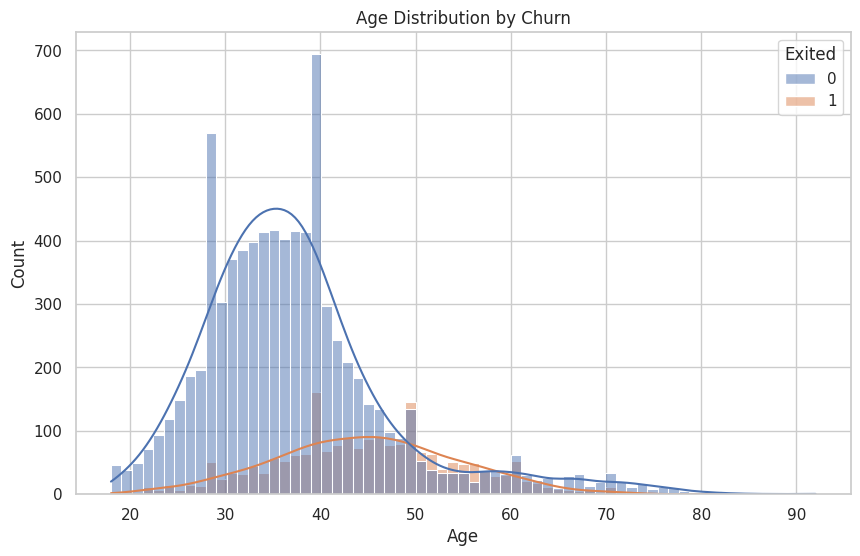

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='Exited', kde=True)
plt.title("Age Distribution by Churn")
plt.show()

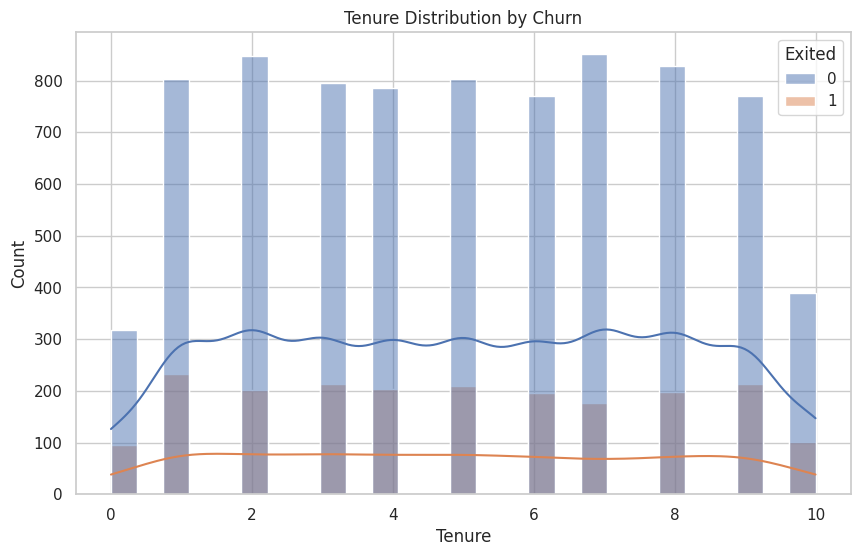

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Tenure', hue='Exited', kde=True)
plt.title("Tenure Distribution by Churn")
plt.show()

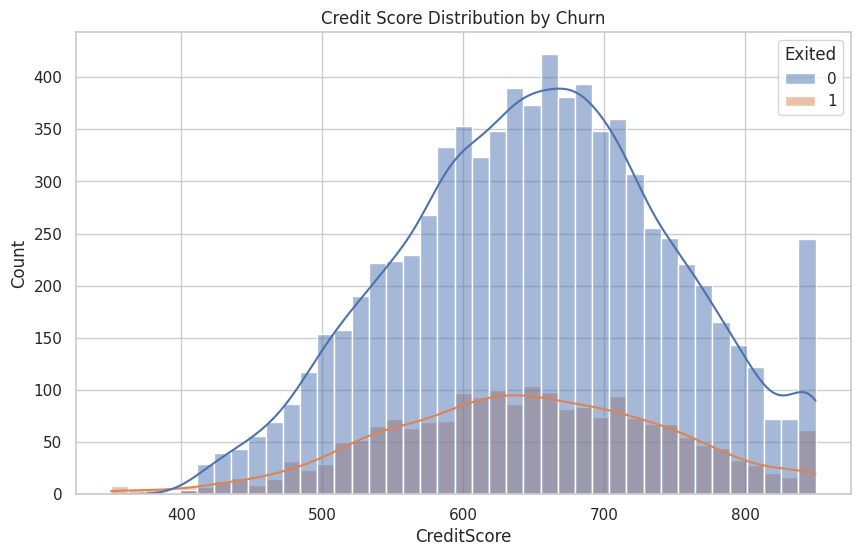

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='CreditScore', hue='Exited', kde=True)
plt.title("Credit Score Distribution by Churn")
plt.show()

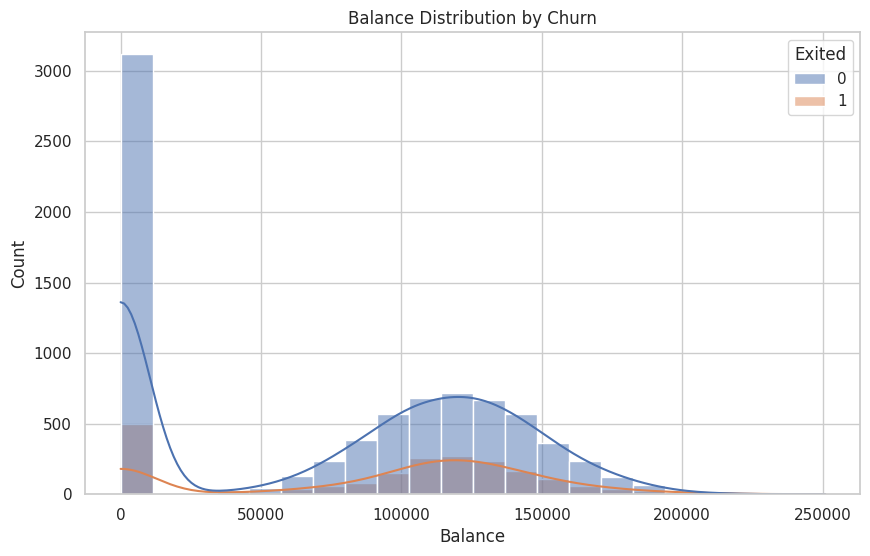

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Balance', hue='Exited', kde=True)
plt.title("Balance Distribution by Churn")
plt.show()

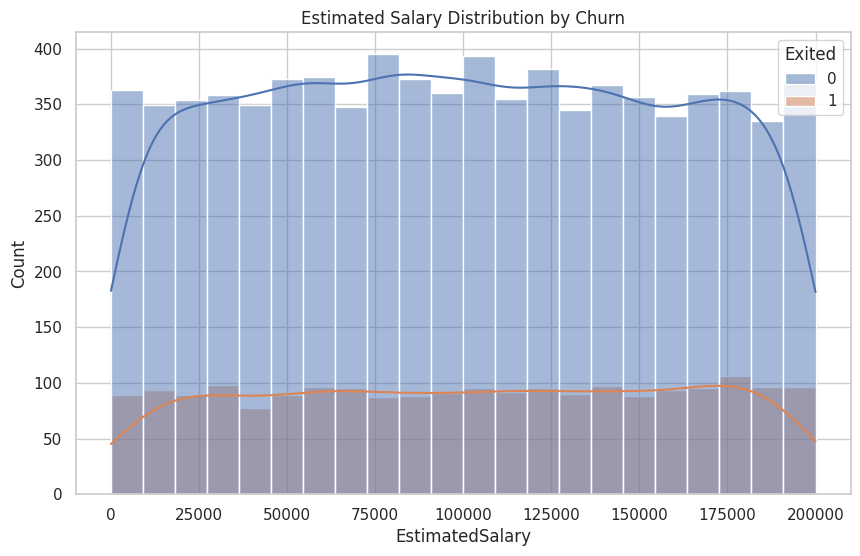

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='EstimatedSalary', hue='Exited', kde=True)
plt.title("Estimated Salary Distribution by Churn")
plt.show()

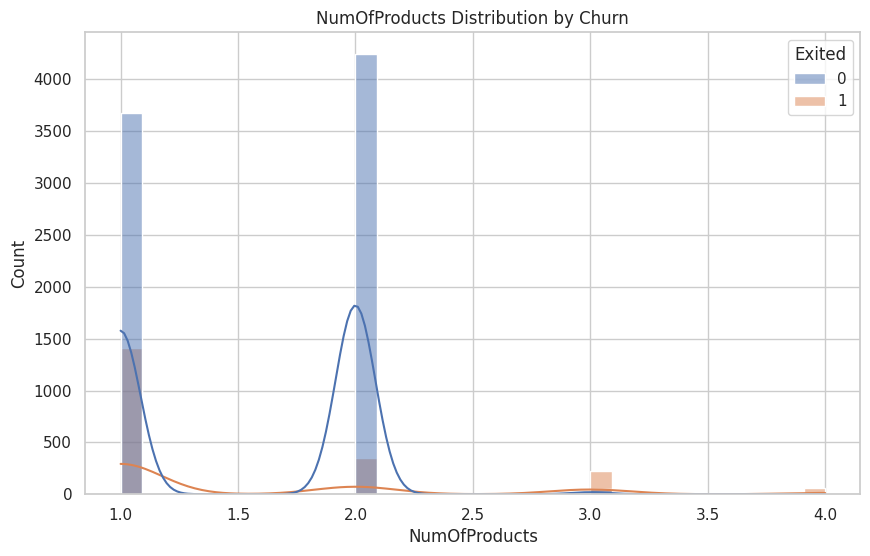

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='NumOfProducts', hue='Exited', kde=True)
plt.title("NumOfProducts Distribution by Churn")
plt.show()

In [ ]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

### Handling categorical features

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Geography']=le.fit_transform(df['Geography'])
df['Gender']=le.fit_transform(df['Gender'])

In [ ]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
5,645,2,1,44,8,113755.78,2,1,0,149756.71,1
6,822,0,1,50,7,0.00,2,1,1,10062.80,0
7,376,1,0,29,4,115046.74,4,1,0,119346.88,1
8,501,0,1,44,4,142051.07,2,0,1,74940.50,0
9,684,0,1,27,2,134603.88,1,1,1,71725.73,0


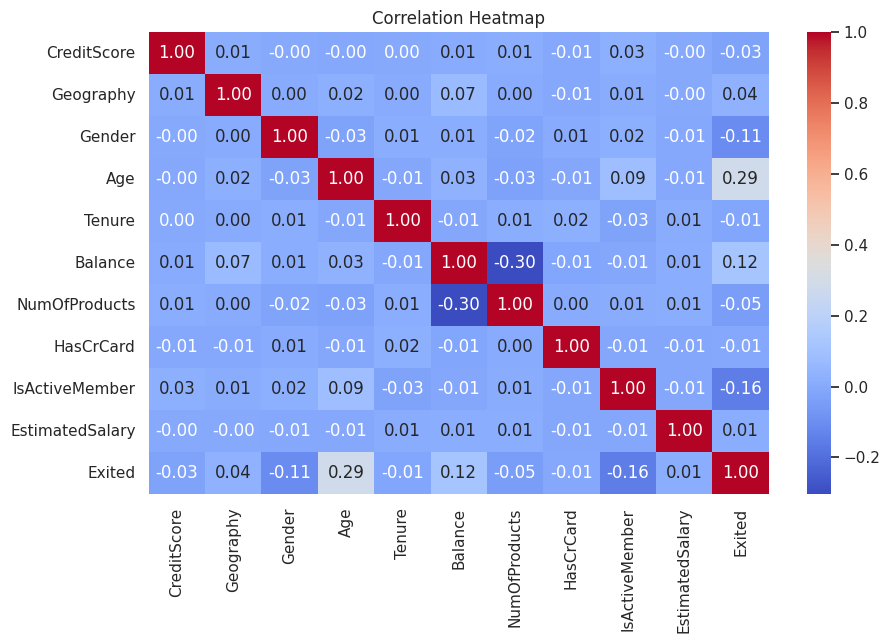

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

No features are highly correlated

### Handling imbalance dataset

In [ ]:
df['Exited'].value_counts()

,count
Exited,
0,7963
1,2037


<Axes: xlabel='Exited', ylabel='count'>

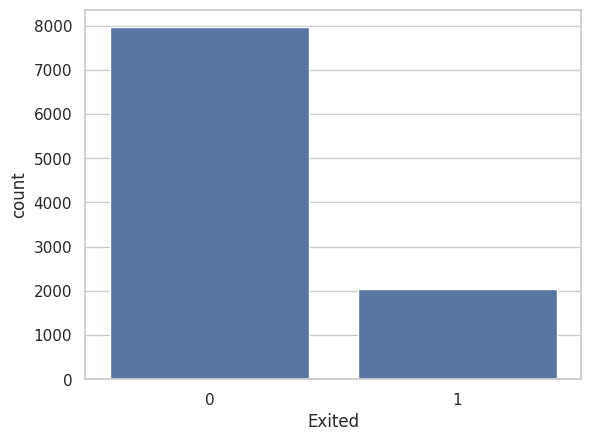

In [ ]:
sns.countplot(data=df, x='Exited')

In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(sampling_strategy='minority',random_state=42)
X=df.drop(columns=['Exited'])
y=df['Exited']
X_res,y_res=smote.fit_resample(X,y)

In [ ]:
y_res[y_res==1].count()

np.int64(7963)

In [ ]:
print(f"Shape of X: {X.shape}")
print(f"Shape of :y {y.shape}")
print(f"Shape of resampled X: {X_res.shape}")
print(f"Shape of resampled y: {y_res.shape}")

Shape of X: (10000, 10)
Shape of :y (10000,)
Shape of resampled X: (15926, 10)
Shape of resampled y: (15926,)


### Train-Test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.2,random_state=42)

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_sc=scaler.fit_transform(X_train)
X_test_sc=scaler.transform(X_test)

### Training different Classification models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import lightgbm as lgb
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,recall_score,f1_score,roc_auc_score

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": lgb.LGBMClassifier()
}

results = []
confusion_matrices={}
classification_reports={}

for name, model in models.items():
    # Scale data only for models that require it
    if name in ["Logistic Regression", "K-Nearest Neighbors", "Naive Bayes"]:
        model.fit(X_train_sc, y_train)
        y_pred = model.predict(X_test_sc)
        y_proba = model.predict_proba(X_test_sc)[:, 1]
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_proba = model.predict_proba(X_test)[:, 1]

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    cr=classification_report(y_test,y_pred)

    results.append({
        "Model": name,
        "Accuracy": round(acc, 4),
        "Precision": round(prec, 4),
        "Recall": round(rec, 4),
        "F1 Score": round(f1, 4),
        "ROC-AUC": round(roc, 4)
    })

    confusion_matrices[name] = cm
    classification_reports[name]=cr

# Convert results to DataFrame
results_df = pd.DataFrame(results)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:17:50] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000488 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 856
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559


### Comparing Metrics

/tmp/ipython-input-110-2206857478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric, ascending=False), palette="viridis")


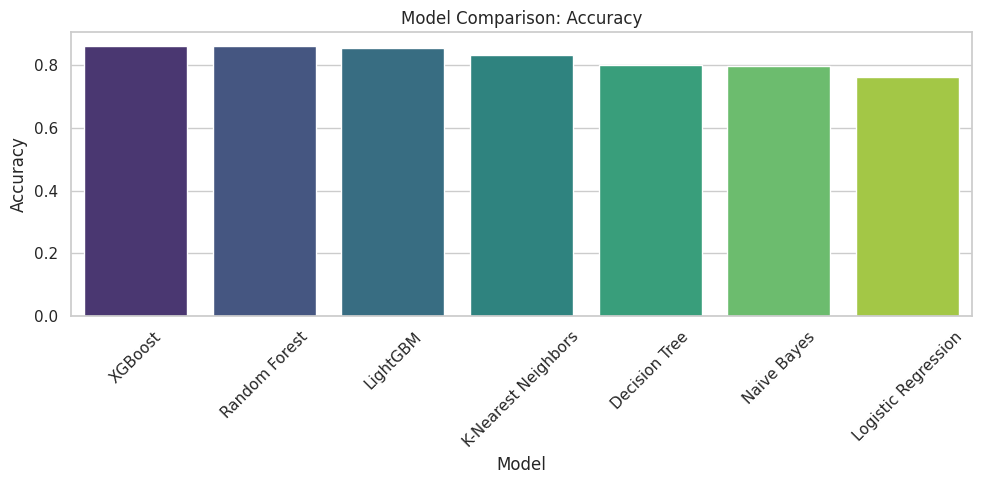

/tmp/ipython-input-110-2206857478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric, ascending=False), palette="viridis")


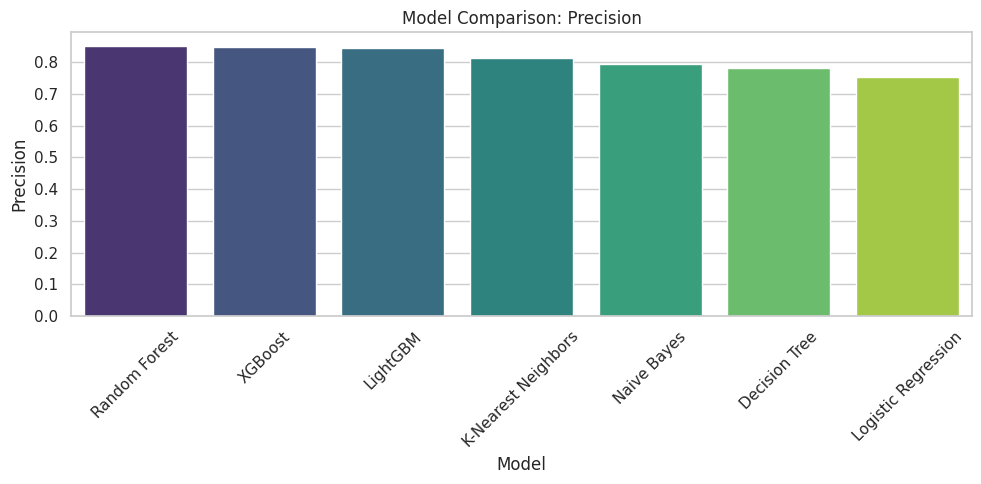

/tmp/ipython-input-110-2206857478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric, ascending=False), palette="viridis")


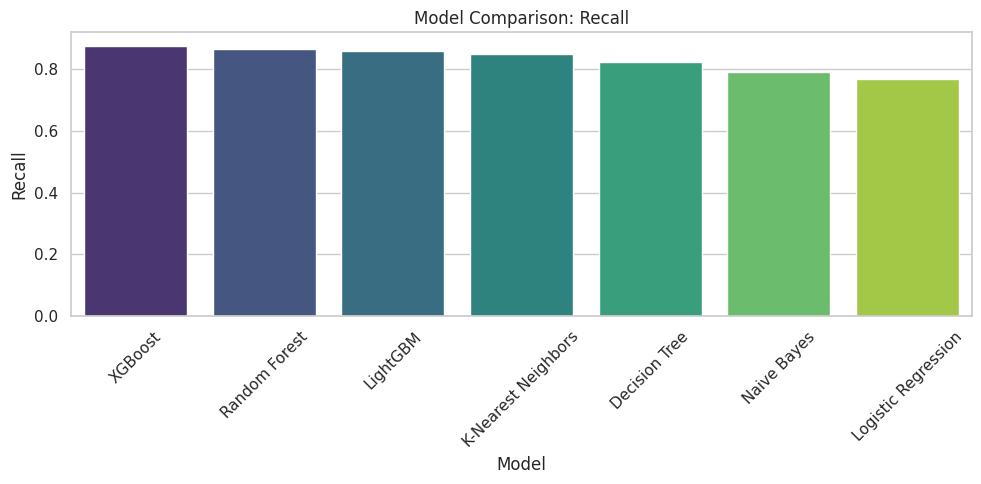

/tmp/ipython-input-110-2206857478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric, ascending=False), palette="viridis")


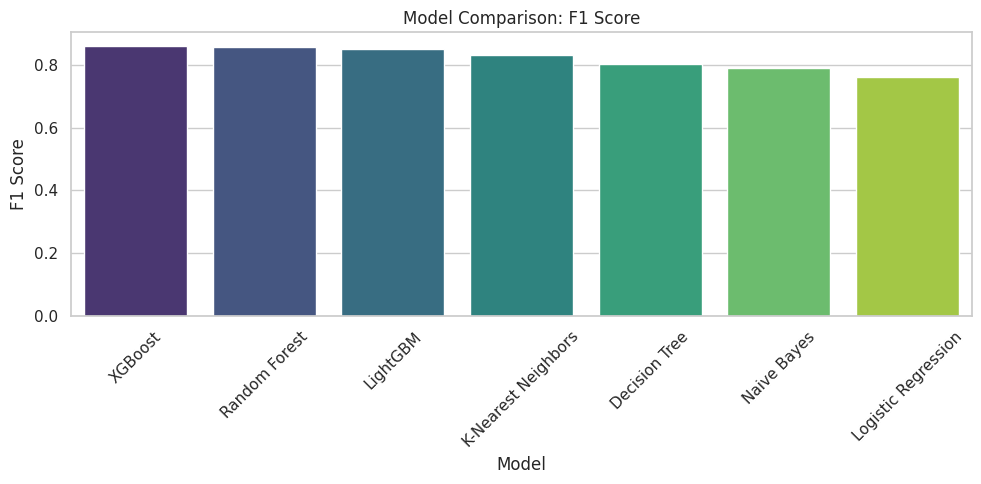

/tmp/ipython-input-110-2206857478.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric, ascending=False), palette="viridis")


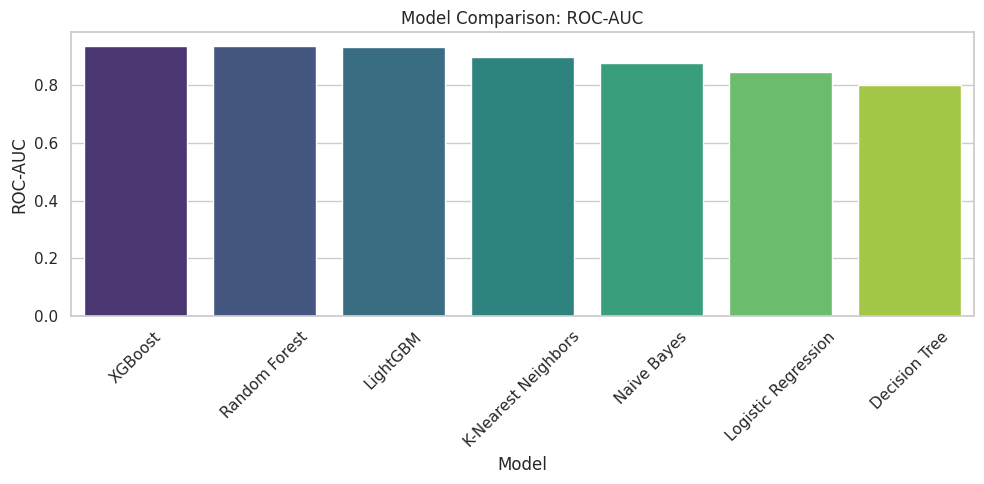

In [ ]:
sns.set(style="whitegrid")

metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "ROC-AUC"]

for metric in metrics:
    plt.figure(figsize=(10, 5))
    sns.barplot(x="Model", y=metric, data=results_df.sort_values(by=metric, ascending=False), palette="viridis")
    plt.xticks(rotation=45)
    plt.title(f"Model Comparison: {metric}")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.tight_layout()
    plt.show()


### Confusion Matrix comparisons

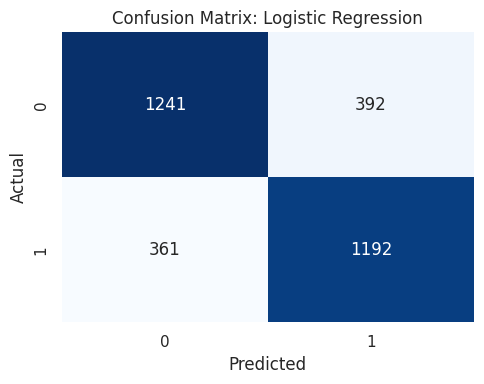

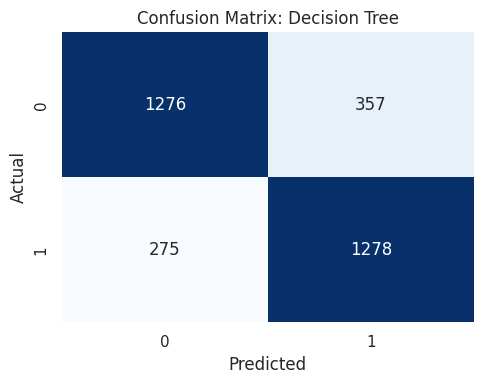

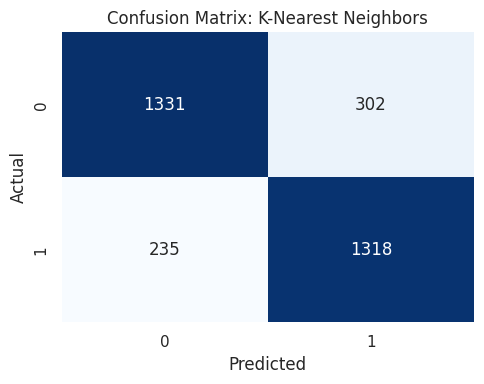

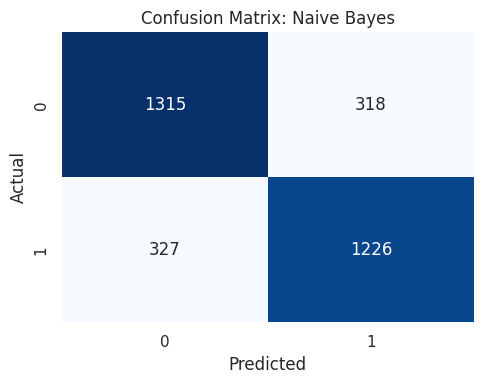

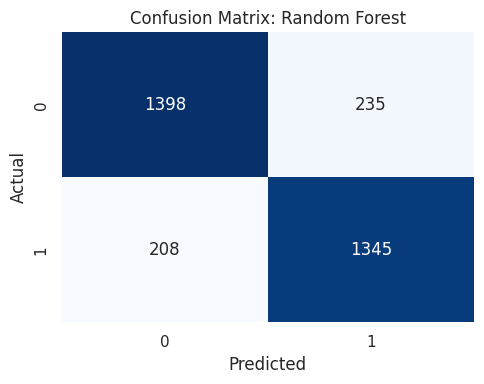

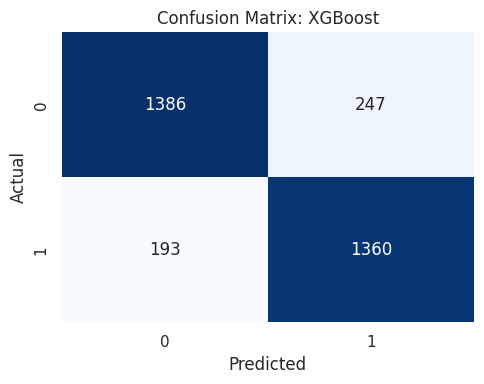

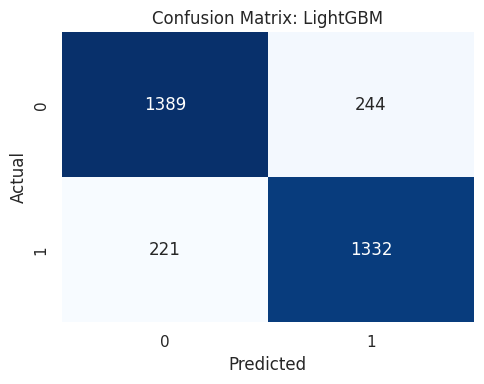

In [ ]:
for model_name, cm in confusion_matrices.items():
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()


### Classification Reports Comparison

In [ ]:
for model_name, cr in classification_reports.items():
    print(f"Classification Report: {model_name}\n{cr}")
    print('-'*50)


Classification Report: Logistic Regression
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      1633
           1       0.75      0.77      0.76      1553

    accuracy                           0.76      3186
   macro avg       0.76      0.76      0.76      3186
weighted avg       0.76      0.76      0.76      3186

--------------------------------------------------
Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1633
           1       0.78      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186

--------------------------------------------------
Classification Report: K-Nearest Neighbors
              precision    recall  f1-score   support

           0       0.85      0.82      0.83      1633
           1

In [ ]:
results_df

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,Logistic Regression,0.7637,0.7525,0.7675,0.7600,0.8470
1,Decision Tree,0.8016,0.7817,0.8229,0.8018,0.8022
2,K-Nearest Neighbors,0.8315,0.8136,0.8487,0.8308,0.8997
3,Naive Bayes,0.7976,0.7940,0.7894,0.7917,0.8765
4,Random Forest,0.8610,0.8513,0.8661,0.8586,0.9369
5,XGBoost,0.8619,0.8463,0.8757,0.8608,0.9371
6,LightGBM,0.8540,0.8452,0.8577,0.8514,0.9333


## XGBoost Model performs the best

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn Probability,Actual Churn
6126,535,0,0,29,5,0.000000,2,0,1,52709.550000,0.051488,0
7093,606,1,0,41,4,132670.530000,1,1,0,156476.360000,0.862912,1
1659,680,2,0,31,9,119825.750000,2,1,1,101139.300000,0.045143,0
15727,699,0,0,47,6,64304.806955,1,1,0,14450.631921,0.979906,1
9682,686,1,0,39,4,157731.600000,2,1,0,162820.600000,0.601576,0


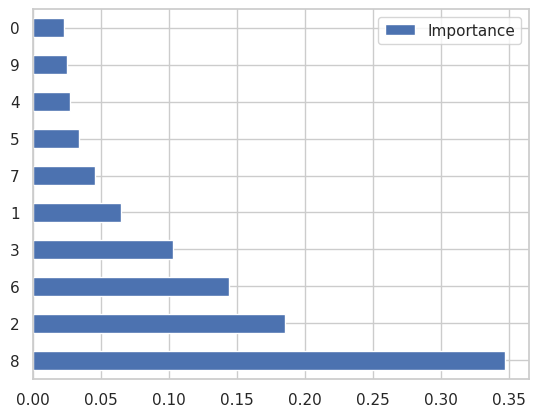

In [ ]:
# For Random Forest or XGBoost
importances = models['XGBoost'].feature_importances_
features = X.columns
feat_imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_imp_df.sort_values(by='Importance', ascending=False).head(10).plot(kind='barh')

# Churn probabilities
probabilities = models['XGBoost'].predict_proba(X_test)[:,1]
churn_prob_df = X_test.copy()
churn_prob_df['Churn Probability'] = probabilities
churn_prob_df['Actual Churn'] = y_test.values
churn_prob_df.head()


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 3, 5],
    'gamma': [0, 0.1, 0.3, 0.5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

random_search = RandomizedSearchCV(
    estimator=xgb_clf,
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Parameters:\n", random_search.best_params_)
best_xgb = random_search.best_estimator_


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [15:19:15] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Best Parameters:
 {'subsample': 0.7, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 7, 'learning_rate': 0.2, 'gamma': 0, 'colsample_bytree': 0.9}


In [ ]:
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))


              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1633
           1       0.85      0.89      0.87      1553

    accuracy                           0.87      3186
   macro avg       0.87      0.87      0.87      3186
weighted avg       0.87      0.87      0.87      3186

ROC-AUC Score: 0.944225052433924


### Final accuracy of the model-- **88%**

# Saving the Model

In [ ]:
import pickle

with open("xgb_model.pkl", "wb") as f:
    pickle.dump(best_xgb, f)

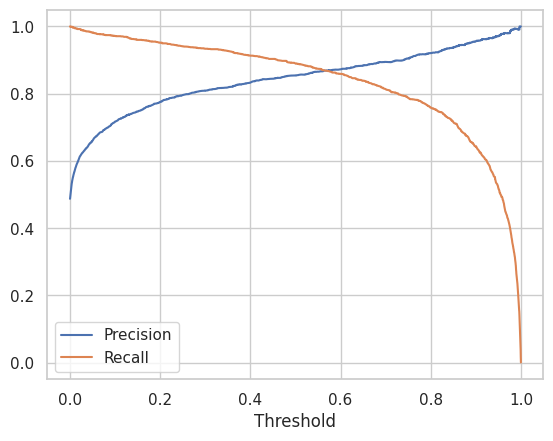

In [ ]:
from sklearn.metrics import precision_recall_curve

probs = best_xgb.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, probs)

# Plotting helps you pick best threshold
import matplotlib.pyplot as plt
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel("Threshold")
plt.legend()
plt.show()
